In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Assuming df is your dataset
df = pd.read_csv('D:\code\HiSCoD\db_hiscod_csv_v1_en.csv', sep=';')

C:\Users\Windows\AppData\Local\Temp\ipykernel_10320\3624181894.py:2: DtypeWarning: Columns (14,20,34,37,39,41,43,45,46,47,48,49,50,51,52,53,54,55,57,63,64,65,66) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:\code\HiSCoD\db_hiscod_csv_v1_en.csv', sep=';')


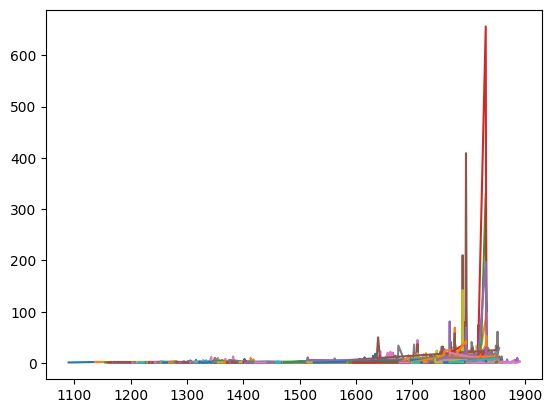

In [3]:
# Group data by year and region, and calculate the number of conflicts for each group
conflicts_by_year_region = df.groupby(['year', 'admin_level_1']).size().reset_index(name='conflict_count')

# Plot the trend of conflict counts in different regions of Europe
for region in conflicts_by_year_region['admin_level_1'].unique():
    region_data = conflicts_by_year_region[conflicts_by_year_region['admin_level_1'] == region]
    plt.plot(region_data['year'], region_data['conflict_count'], label=region)

#plt.xlabel('Year')
#plt.ylabel('Conflict Count')
#plt.title('Conflict Count Trend in Different European Regions')


# Adjust the size of the legend
#plt.legend(fontsize='small', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)

#plt.show()

In [4]:
# Classify conflicts by type and calculate the number of conflicts every decade
df['decade'] = (df['year'] // 10) * 10
conflicts_by_decade_type = df.groupby(['decade', 'riot_type_hiscod']).size().reset_index(name='conflict_count')

# Find the most prominent conflict type in each decade
most_prominent_conflicts = conflicts_by_decade_type.loc[conflicts_by_decade_type.groupby('decade')['conflict_count'].idxmax()]
print(most_prominent_conflicts)

     decade      riot_type_hiscod  conflict_count
0    1090.0    Political conflict               1
1    1130.0    Religious conflict               1
2    1140.0    Political conflict               1
4    1150.0    Religious conflict               1
5    1160.0    Political conflict               2
..      ...                   ...             ...
360  1850.0  Other forms conflict             247
367  1860.0  Other forms conflict              10
371  1870.0  Other forms conflict              12
375  1880.0  Other forms conflict              29
378  1890.0  Other forms conflict               3

[73 rows x 3 columns]


In [5]:
conflicts_by_decade = df.groupby(['decade']).size().reset_index(name='conflict_count')
conflicts_by_decade

,decade,conflict_count
0,1090.0,1
1,1130.0,1
2,1140.0,2
3,1150.0,1
4,1160.0,2
...,...,...
72,1850.0,558
73,1860.0,27
74,1870.0,33
75,1880.0,48


In [16]:
conflicts_by_decade.to_csv('conflicts_by_decade.csv', sep=',', index=False, encoding='utf-8')

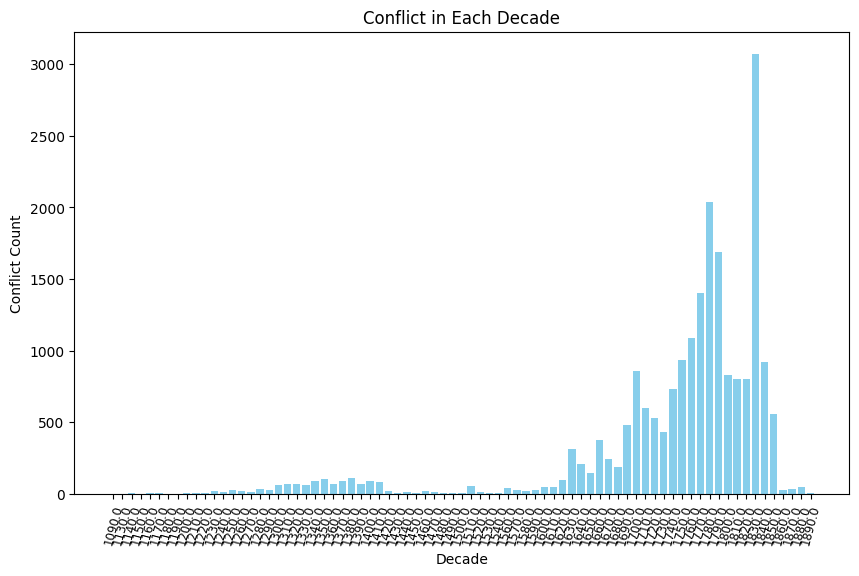

In [14]:
# Plot a bar chart of the most prominent conflict type in each decade
plt.figure(figsize=(10, 6))
plt.bar(conflicts_by_decade['decade'].astype(str), conflicts_by_decade['conflict_count'], color='skyblue')
plt.xlabel('Decade')
plt.ylabel('Conflict Count')

# Adjust the size of the x-axis tick labels
plt.xticks(fontsize='small', rotation=75)
plt.title('Conflict in Each Decade')
plt.show()



In [6]:
conflicts_by_decade

,decade,conflict_count
0,1090.0,1
1,1130.0,1
2,1140.0,2
3,1150.0,1
4,1160.0,2
...,...,...
72,1850.0,558
73,1860.0,27
74,1870.0,33
75,1880.0,48


In [4]:
# Classify conflicts by type and calculate the number of conflicts every decade
df['decade'] = (df['year'] // 10) * 10
conflicts_by_decade_type = df.groupby(['decade', 'riot_type_hiscod']).size().reset_index(name='conflict_count')

# Find the most prominent conflict type in each decade
most_prominent_conflicts = conflicts_by_decade_type.loc[conflicts_by_decade_type.groupby('decade')['conflict_count'].idxmax()]
print(most_prominent_conflicts)

     decade      riot_type_hiscod  conflict_count
0    1090.0    Political conflict               1
1    1130.0    Religious conflict               1
2    1140.0    Political conflict               1
4    1150.0    Religious conflict               1
5    1160.0    Political conflict               2
..      ...                   ...             ...
360  1850.0  Other forms conflict             247
367  1860.0  Other forms conflict              10
371  1870.0  Other forms conflict              12
375  1880.0  Other forms conflict              29
378  1890.0  Other forms conflict               3

[73 rows x 3 columns]


In [ ]:
conflicts_by_decade = df.groupby(['decade']).size().reset_index(name='conflict_count')
conflicts_by_decade

In [13]:
print(df['year'])

0        1789.0
1        1789.0
2        1789.0
3        1789.0
4        1789.0
          ...  
20946    1789.0
20947    1789.0
20948    1789.0
20949    1585.0
20950    1436.0
Name: year, Length: 20951, dtype: float64


In [5]:
conflicts_by_year =  df.groupby(['year']).size().reset_index(name='conflict_count')
conflicts_by_year

,year,conflict_count
0,1090.0,1
1,1137.0,1
2,1142.0,2
3,1155.0,1
4,1160.0,1
...,...,...
576,1886.0,11
577,1887.0,4
578,1888.0,4
579,1889.0,5


In [6]:
conflicts_by_year.to_csv('conflicts_by_year.csv', sep=',', index=False, encoding='utf-8')

PermissionError: [Errno 13] Permission denied: 'conflicts_by_year.csv'

In [7]:
conflicts_by_year_np = conflicts_by_year.to_numpy().astype(int)

In [8]:
conflicts_timestamp = []
for year in conflicts_by_year_np:
    conflicts_timestamp.append(np.linspace(year[0],year[0]+1,year[1]+2)[1:-1])


conflicts_timestamp = np.concatenate(conflicts_timestamp)
print(conflicts_timestamp)


[1090.5        1137.5        1142.33333333 ... 1890.5        1890.66666667
 1890.83333333]


In [9]:
conflicts_timestamp.shape

(20950,)

In [10]:
!pip install hawkes
import Hawkes as hk

In [11]:
model = hk.estimator()
model.set_kernel('pow')
model.set_baseline('plinear',num_basis=2)

In [12]:
conflicts_timestamp_1k = conflicts_timestamp - 1000
conflicts_timestamp_1k.shape

(20950,)

In [21]:
sample =  np.random.choice(conflicts_timestamp_1k, size=7000, replace=False)
sample = np.sort(sample)
sample.shape

(7000,)

In [22]:
itv = [0,1000] # the observation interval
model.fit(sample,itv) # T is the event times (numpy.ndarray)
print("parameter:",model.parameter) # the estimated parameter values
print("branching ratio:",model.br) # the branching ratio
print("log-likelihood:",model.L) # the log-likelihood of the estimated parameter values
print("AIC:",model.AIC) # the AIC of the estimated parameter values

parameter: {'mu': array([0.11464039, 0.13613573]), 'k': 2.98526119755898, 'p': 3.9276913703822114, 'c': 1.012911975042041}
branching ratio: 0.9820753470749359
log-likelihood: 17711.927561707438
AIC: -35415.855123414876


In [184]:
lista = []
for i in range(10):
    sample =  np.random.choice(conflicts_timestamp_1k, size=7000, replace=False)
    sample = np.sort(sample)

    itv = [0,1000] # the observation interval
    model.fit(sample,itv) # T is the event times (numpy.ndarray)
    lista.append((model.parameter,model.br,model.L,model.AIC))



In [185]:
print(lista)

[({'mu': 0.10254960542951573, 'k': 0.8513607996557889, 'p': 2.907104075168672, 'c': 0.6602312046611646}, 0.9853661966290926, 17619.82898663575, -35231.6579732715), ({'mu': 0.12960043456403805, 'k': 0.7630587333572606, 'p': 2.9945854888700985, 'c': 0.6235242967084745}, 0.9814942986027978, 17515.484020849162, -35022.968041698325), ({'mu': 0.12491650339664506, 'k': 0.9852404260519468, 'p': 3.1430675686343155, 'c': 0.7017241931029863}, 0.9821595676163232, 17574.338484991866, -35140.67696998373), ({'mu': 0.13522875753302838, 'k': 2.633941777898727, 'p': 3.7685150690529374, 'c': 0.9891071228993883}, 0.980681975923584, 17501.680124458577, -34995.36024891715), ({'mu': 0.12925985097631973, 'k': 0.718866600524103, 'p': 2.8646622403862474, 'c': 0.6058128953049515}, 0.9815519380984747, 17598.615640717453, -35189.231281434906), ({'mu': 0.13880644766799055, 'k': 1.417008895712501, 'p': 3.3988087950083217, 'c': 0.8096902635614789}, 0.9801720912090763, 17499.565488560907, -34991.130977121815), ({'mu':

({'mu': 0.1398846918189064, 'k': 1.4310481265585033, 'p': 3.385828852516116, 'c': 0.8140123214240511}, 0.9800182035336721, 17639.439790837387, -35270.87958167477)

In [24]:
best_mu = 0.5197
best_k = 2.8339
best_p = 3.3858
best_c = 1.1140

In [25]:
simulation = hk.simulator()
simulation.set_kernel('pow')
simulation.set_baseline('const')
para = {'mu':best_mu, 'k':best_k, 'p':best_p, 'c':best_c}
simulation.set_parameter(para)

In [26]:
itv_simu = [0,890] # the observation interval
result = simulation.simulate(itv_simu)

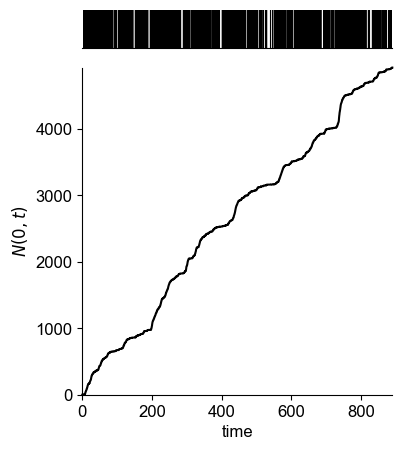

In [27]:
simulation.plot_N()

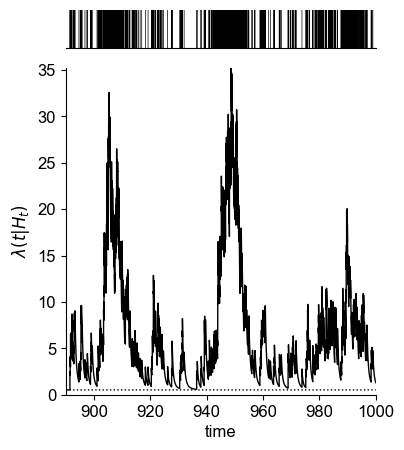

In [280]:
simulation.plot_l()

In [9]:
# Convert the year to decade and century intervals
df['decade'] = (df['year'] // 10) * 10
df['century'] = (df['year'] // 100) * 100

# Classify conflicts by type and calculate the number of conflicts every decade and every century
conflicts_by_decade_type = df.groupby(['decade', 'riot_type_hiscod']).size().reset_index(name='conflict_count')
conflicts_by_century_type = df.groupby(['century', 'riot_type_hiscod']).size().reset_index(name='conflict_count')

# Find the most prominent conflict type in each decade and each century
most_prominent_conflicts_decade = conflicts_by_decade_type.loc[conflicts_by_decade_type.groupby('decade')['conflict_count'].idxmax()]
most_prominent_conflicts_century = conflicts_by_century_type.loc[conflicts_by_century_type.groupby('century')['conflict_count'].idxmax()]

# Output the results
print('Most prominent conflict type in each decade:')
print(most_prominent_conflicts_decade)
print('\nMost prominent conflict type in each century:')
print(most_prominent_conflicts_century)



Most prominent conflict type in each decade:
     decade      riot_type_hiscod  conflict_count
0    1090.0    Political conflict               1
1    1130.0    Religious conflict               1
2    1140.0    Political conflict               1
4    1150.0    Religious conflict               1
5    1160.0    Political conflict               2
..      ...                   ...             ...
360  1850.0  Other forms conflict             247
367  1860.0  Other forms conflict              10
371  1870.0  Other forms conflict              12
375  1880.0  Other forms conflict              29
378  1890.0  Other forms conflict               3

[73 rows x 3 columns]

Most prominent conflict type in each century:
    century                                 riot_type_hiscod  conflict_count
0    1000.0                               Political conflict               1
2    1100.0                               Political conflict               4
9    1200.0                               Political co


All types of conflicts:
['Tax riot' 'Feudal conflict' 'Food riot' 'Labour conflict'
 'Conflict with local and/or national authorities' 'Other forms conflict'
 'Religious conflict' 'Political conflict' nan 'Slave revolt']


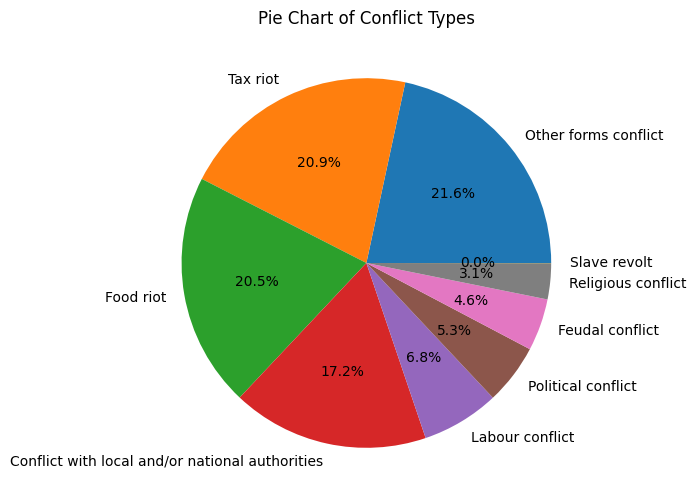

In [10]:
# Output all types of conflicts
print('\nAll types of conflicts:')
print(df['riot_type_hiscod'].unique())

conflicts_by_type = df['riot_type_hiscod'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(conflicts_by_type.values, labels=conflicts_by_type.index, autopct='%1.1f%%')
plt.title('Pie Chart of Conflict Types')
plt.show()